In [ ]:
import h5py
import os
import glob

import numpy as np
from scipy.stats import zscore
from scipy.signal import find_peaks
import matplotlib.pyplot as plt



from scipy.stats import binned_statistic
from scipy.signal import find_peaks
from scipy.optimize import curve_fit  # Add this import statement
from scipy.signal import convolve2d

In [5]:
def bin_tf_to_fpp(x, power, bin_count):
    if x.ndim == 1:  # Handle the case when x is of size (2)
        bin_ranges = np.arange(x[0], x[1], 1)
        fpp = binned_statistic(bin_ranges, power[:, x[0]:x[1]], 'mean', bins=bin_count)[0]
        fpp = np.expand_dims(fpp, axis=0)  # Add an extra dimension to match the desired output shape
    elif x.ndim == 2:  # Handle the case when x is of size (n, 2)
        fpp = []
        for i in range(x.shape[0]):
            bin_ranges = np.arange(x[i, 0], x[i, 1], 1)
            fpp_row = binned_statistic(bin_ranges, power[:, x[i, 0]:x[i, 1]], 'mean', bins=bin_count)[0]
            fpp.append(fpp_row)
        fpp = np.array(fpp)
    else:
        raise ValueError("Invalid size for x")

    return fpp

def adaptive_threshold(data, window_size):
    std_values = np.zeros_like(data)
    
    for i in range(len(data)):
        start = max(0, i - window_size)
        end = min(len(data), i + window_size)
        std_values[i] = np.std(data[start:end])

    return std_values
def boxcar_smooth(x, boxcar_window):
    """
    Smooth a 1D or 2D array using a boxcar window.

    Parameters:
    - x (numpy.ndarray): Input array to be smoothed.
    - boxcar_window (int or tuple): Size of the boxcar window for smoothing.
      For 1D array, an integer representing the window size.
      For 2D array, a tuple (t, f) representing window sizes along the time (t) and frequency (f) dimensions.

    Returns:
    - numpy.ndarray: Smoothed array using the boxcar window.

    Notes:
    - If the input array is 1D, the boxcar window size is adjusted to be odd.
    - If the input array is 2D, separate boxcar windows are created for the time (t) and frequency (f) dimensions.

    Example:
    ```python
    import numpy as np

    # Example usage:
    signal_1d = np.random.rand(100)  # Replace with your actual 1D signal
    window_size_1d = 5
    smoothed_1d = boxcar_smooth(signal_1d, window_size_1d)
    print(smoothed_1d)

    signal_2d = np.random.rand(100, 50)  # Replace with your actual 2D signal
    window_size_2d = (5, 3)
    smoothed_2d = boxcar_smooth(signal_2d, window_size_2d)
    print(smoothed_2d)
    ```
    """
    # Check if the input array x is 1-dimensional
    if x.ndim == 1:
        # Check if the boxcar window size is even, and if so, make it odd by adding 1
        if boxcar_window % 2 == 0:
            boxcar_window += 1
        # Create a boxcar window of size boxcar_window for smoothing
        window = np.ones((1, boxcar_window)) / boxcar_window
        # Perform 1-dimensional convolution to smooth the input array x
        x_spectrum = np.convolve(x, window, mode='same')
    else:
        # Adjust the boxcar window size to be odd for both dimensions
        bool_window = np.where(~np.array(boxcar_window) % 2 == 0, boxcar_window, np.array(boxcar_window) + 1)
        # Create separate boxcar windows for time (t) and frequency (f) dimensions
        window_t = np.ones((1, bool_window[0])) / bool_window[0]
        window_f = np.ones((1, bool_window[1])) / bool_window[1]
        # Perform 2-dimensional convolution first along the time dimension (t)
        x_spectrum_t = convolve2d(x, window_t, mode='same')
        # Perform 2-dimensional convolution along the frequency dimension (f)
        x_spectrum = convolve2d(x_spectrum_t, window_f.T, mode='same')
    # Return the smoothed array x_spectrum
    return x_spectrum

Processing data in folder: E:\Donders\1\processed
Processing subfolder: CN
Processing dataset folder: post_trial1_2017-09-28_11-30-59
Processing HDF5 file: E:\Donders\1\processed\CN\post_trial1_2017-09-28_11-30-59\post_trial1_2017-09-28_11-30-59_REM_dict.h5
Processing group: post_trial1_2017-09-28_11-30-59
Processing dataset folder: post_trial2_2017-09-28_12-21-41
Processing HDF5 file: E:\Donders\1\processed\CN\post_trial2_2017-09-28_12-21-41\post_trial2_2017-09-28_12-21-41_REM_dict.h5
Processing group: post_trial2_2017-09-28_12-21-41
Processing dataset folder: post_trial3_2017-09-28_13-12-53
Processing HDF5 file: E:\Donders\1\processed\CN\post_trial3_2017-09-28_13-12-53\post_trial3_2017-09-28_13-12-53_REM_dict.h5
Processing group: post_trial3_2017-09-28_13-12-53
Processing dataset folder: post_trial4_2017-09-28_14-03-38
Processing HDF5 file: E:\Donders\1\processed\CN\post_trial4_2017-09-28_14-03-38\post_trial4_2017-09-28_14-03-38_REM_dict.h5
Processing group: post_trial4_2017-09-28_14

Error: fpp_plots is 1D. Check your data.
Processing dataset folder: presleep_2017-11-13_10-03-32
Processing HDF5 file: E:\Donders\3\processed\CN\presleep_2017-11-13_10-03-32\presleep_2017-11-13_10-03-32_REM_dict.h5
Processing group: presleep_2017-11-13_10-03-32
Processing subfolder: OD
Processing dataset folder: post_trial1_2017-11-16_11-23-46
Processing HDF5 file: E:\Donders\3\processed\OD\post_trial1_2017-11-16_11-23-46\post_trial1_2017-11-16_11-23-46_REM_dict.h5
Processing group: post_trial1_2017-11-16_11-23-46
Processing dataset folder: post_trial2_2017-11-16_12-14-17
Processing HDF5 file: E:\Donders\3\processed\OD\post_trial2_2017-11-16_12-14-17\post_trial2_2017-11-16_12-14-17_REM_dict.h5
Processing group: post_trial2_2017-11-16_12-14-17
Error: fpp_plots is 1D. Check your data.
Processing dataset folder: post_trial3_2017-11-16_13-04-51
Processing HDF5 file: E:\Donders\3\processed\OD\post_trial3_2017-11-16_13-04-51\post_trial3_2017-11-16_13-04-51_REM_dict.h5
Processing group: post_

Processing dataset folder: post_trial3_2017-12-11_12-52-58
Processing HDF5 file: E:\Donders\4\processed\CN\post_trial3_2017-12-11_12-52-58\post_trial3_2017-12-11_12-52-58_REM_dict.h5
Processing group: post_trial3_2017-12-11_12-52-58
Processing dataset folder: post_trial4_2017-12-11_13-43-39
Processing HDF5 file: E:\Donders\4\processed\CN\post_trial4_2017-12-11_13-43-39\post_trial4_2017-12-11_13-43-39_REM_dict.h5
Processing group: post_trial4_2017-12-11_13-43-39
Processing dataset folder: post_trial5_2017-12-11_14-34-11
Processing HDF5 file: E:\Donders\4\processed\CN\post_trial5_2017-12-11_14-34-11\post_trial5_2017-12-11_14-34-11_REM_dict.h5
Processing group: post_trial5_2017-12-11_14-34-11
Processing dataset folder: presleep_2017-12-11_10-16-03
Processing HDF5 file: E:\Donders\4\processed\CN\presleep_2017-12-11_10-16-03\presleep_2017-12-11_10-16-03_REM_dict.h5
Processing group: presleep_2017-12-11_10-16-03
Processing subfolder: OD
Processing dataset folder: post_trial1_2017-12-21_12-38

Processing dataset folder: 2018-06-04_12-40-03_Post_Trial3
Processing HDF5 file: E:\Donders\9\processed\2018_06_04_Study_day10_OR\2018-06-04_12-40-03_Post_Trial3\2018-06-04_12-40-03_Post_Trial3_REM_dict.h5
Processing group: 2018-06-04_12-40-03_Post_Trial3
Processing dataset folder: 2018-06-04_13-30-45_post_Trial4
Processing HDF5 file: E:\Donders\9\processed\2018_06_04_Study_day10_OR\2018-06-04_13-30-45_post_Trial4\2018-06-04_13-30-45_post_Trial4_REM_dict.h5
Processing group: 2018-06-04_13-30-45_post_Trial4
Processing dataset folder: 2018-06-04_14-21-37_Post_Trial5
Processing HDF5 file: E:\Donders\9\processed\2018_06_04_Study_day10_OR\2018-06-04_14-21-37_Post_Trial5\2018-06-04_14-21-37_Post_Trial5_REM_dict.h5
Processing group: 2018-06-04_14-21-37_Post_Trial5
Processing subfolder: 2018_06_23_study_day14_OR+SD&NOV
Processing dataset folder: 2018-06-23_10-01-45_Pre-sleep
Processing HDF5 file: E:\Donders\9\processed\2018_06_23_study_day14_OR+SD&NOV\2018-06-23_10-01-45_Pre-sleep\2018-06-23_1

Processing dataset folder: 2018-05-13_13-57-18_Post_Trial5
Processing HDF5 file: E:\Donders\9\processed\HC\2018-05-13_13-57-18_Post_Trial5\2018-05-13_13-57-18_Post_Trial5_REM_dict.h5
Processing group: 2018-05-13_13-57-18_Post_Trial5
Processing subfolder: OD
Processing dataset folder: 2018-05-23_10-00-03_Pre-sleep
Processing HDF5 file: E:\Donders\9\processed\OD\2018-05-23_10-00-03_Pre-sleep\2018-05-23_10-00-03_Pre-sleep_REM_dict.h5
Processing group: 2018-05-23_10-00-03_Pre-sleep
Processing dataset folder: 2018-05-23_10-50-30_Post_Trial1
Processing HDF5 file: E:\Donders\9\processed\OD\2018-05-23_10-50-30_Post_Trial1\2018-05-23_10-50-30_Post_Trial1_REM_dict.h5
Processing group: 2018-05-23_10-50-30_Post_Trial1
Processing dataset folder: 2018-05-23_11-41-01_Post_Trial2
Processing HDF5 file: E:\Donders\9\processed\OD\2018-05-23_11-41-01_Post_Trial2\2018-05-23_11-41-01_Post_Trial2_REM_dict.h5
Processing group: 2018-05-23_11-41-01_Post_Trial2
Processing dataset folder: 2018-05-23_12-31-29_Post

Processing dataset folder: 2019-05-13_13-05-57_post_trial3
Processing HDF5 file: E:\Donders\13\processed\CN\2019-05-13_13-05-57_post_trial3\2019-05-13_13-05-57_post_trial3_REM_dict.h5
Processing group: 2019-05-13_13-05-57_post_trial3
Processing dataset folder: 2019-05-13_13-56-29_post_trial4
Processing HDF5 file: E:\Donders\13\processed\CN\2019-05-13_13-56-29_post_trial4\2019-05-13_13-56-29_post_trial4_REM_dict.h5
Processing group: 2019-05-13_13-56-29_post_trial4
Processing dataset folder: 2019-05-13_14-53-54_post_trial5
Processing HDF5 file: E:\Donders\13\processed\CN\2019-05-13_14-53-54_post_trial5\2019-05-13_14-53-54_post_trial5_REM_dict.h5
Processing group: 2019-05-13_14-53-54_post_trial5
Processing subfolder: Rat_OS_Ephys_Rat13_344994_SD11_OR_N_06-07_06_2019
Processing dataset folder: 2019-06-06_10-53-09_presleep
Processing HDF5 file: E:\Donders\13\processed\Rat_OS_Ephys_Rat13_344994_SD11_OR_N_06-07_06_2019\2019-06-06_10-53-09_presleep\2019-06-06_10-53-09_presleep_REM_dict.h5
Proc

Processing dataset folder: 2019-05-16_13-00-09_post_trial3
Processing HDF5 file: E:\Donders\13\processed\Rat_OS_Ephys_Rat13_344994_SD3_OR_16-17_05_2019\2019-05-16_13-00-09_post_trial3\2019-05-16_13-00-09_post_trial3_REM_dict.h5
Processing group: 2019-05-16_13-00-09_post_trial3
Processing dataset folder: 2019-05-16_13-51-09_post_trial4
Processing HDF5 file: E:\Donders\13\processed\Rat_OS_Ephys_Rat13_344994_SD3_OR_16-17_05_2019\2019-05-16_13-51-09_post_trial4\2019-05-16_13-51-09_post_trial4_REM_dict.h5
Processing group: 2019-05-16_13-51-09_post_trial4
Processing dataset folder: 2019-05-16_14-41-48_post_trial5
Processing HDF5 file: E:\Donders\13\processed\Rat_OS_Ephys_Rat13_344994_SD3_OR_16-17_05_2019\2019-05-16_14-41-48_post_trial5\2019-05-16_14-41-48_post_trial5_REM_dict.h5
Processing group: 2019-05-16_14-41-48_post_trial5
Processing subfolder: Rat_OS_Ephys_Rat13_344994_SD4_OD_21-22_05_2019
Processing dataset folder: 2019-05-21_10-38-24_presleep
Processing HDF5 file: E:\Donders\13\proce

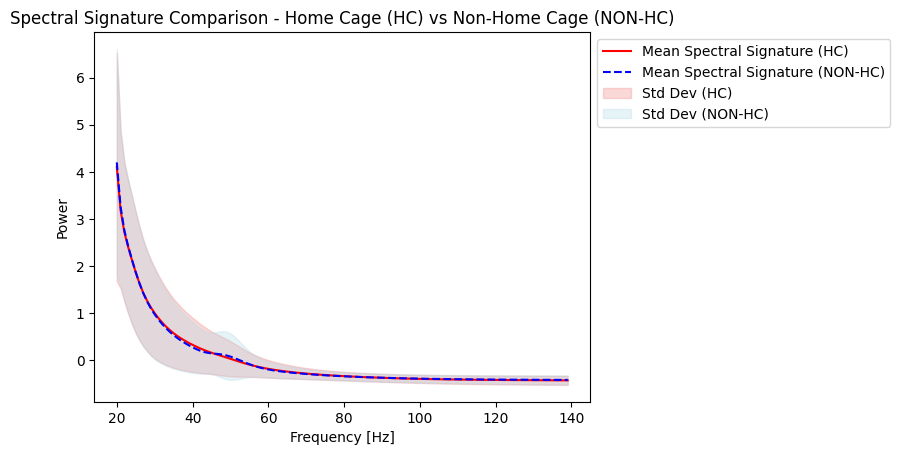

In [11]:
import os
import glob
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore


# Define the root folder containing '1', '2', '3', etc.
root_folder = r"E:\Donders"

# Define the target folders (numerical)
target_folders = ['1', '3','4', '9', '11', '13']
frequencies = np.arange(20, 140, 1)
power_list_hc = []
power_list_non_hc = []

for target_folder in target_folders:
    # Construct the path to the processed folder
    processed_folder = os.path.join(root_folder, target_folder, 'processed')

    # Check if the processed folder exists
    if os.path.exists(processed_folder):
        print(f"Processing data in folder: {processed_folder}")

        # Iterate through subfolders in processed folder
        for subfolder in os.listdir(processed_folder):
            subfolder_path = os.path.join(processed_folder, subfolder)

            # Check if it's a directory and contains "HC"
            if os.path.isdir(subfolder_path):
                print(f"Processing subfolder: {subfolder}")

                # Iterate through sub-subfolders (containing datasets)
                for dataset_folder in os.listdir(subfolder_path):
                    dataset_folder_path = os.path.join(subfolder_path, dataset_folder)

                    # Check if it's a directory
                    if os.path.isdir(dataset_folder_path):
                        print(f"Processing dataset folder: {dataset_folder}")

                        # Use glob to get all .h5 files in the dataset folder
                        hdf5_files = glob.glob(os.path.join(dataset_folder_path, '*.h5'))

                        # Iterate over each .h5 file
                        for hdf5_file_path in hdf5_files:
                            print(f"Processing HDF5 file: {hdf5_file_path}")

                            # Open the HDF5 file in read mode
                            with h5py.File(hdf5_file_path, 'r') as hdf_file:
                                # Iterate over all groups in the file
                                for group_name in hdf_file.keys():
                                    print(f"Processing group: {group_name}")

                                    # Access the current group
                                    current_group = hdf_file[group_name]

                                    rem_dict_keys = list(current_group.keys())
                                    subset_frequencies = np.arange(20, 140, 1)
                                    # Initialize an empty array to accumulate mean power arrays

                                    for rem_key in rem_dict_keys:
                                        wavelet_transform = hdf_file[group_name][rem_key]['wavelet_transform'][:]
                                        power_matrix = np.power(wavelet_transform, 2)
                                        power = zscore(power_matrix, axis=0)
                                        start_end = hdf_file[group_name][rem_key]['start-end'][:]
                                        fpp_cycles = hdf_file[group_name][rem_key]['Cycles'][:]
                                        newcycles = fpp_cycles[:, [0, -1]] - start_end[0]

                                        fpp_plots = bin_tf_to_fpp(newcycles, power, 19)

                                        # Check if fpp_plots is 1D before attempting to calculate the mean along axis 2
                                        if len(fpp_plots.shape) > 1:
                                            mean_along_axis_2 = (np.mean(fpp_plots, axis=2)).T
                                            if "HC" in subfolder:
                                                power_list_hc.append(mean_along_axis_2)
                                            else:
                                                power_list_non_hc.append(mean_along_axis_2)
                                        else:
                                            print(f"Error: fpp_plots is 1D. Check your data.")

# Print some information about the collected data
print(f"Number of HC data arrays: {len(power_list_hc)}")
print(f"Number of NON-HC data arrays: {len(power_list_non_hc)}")
# Replace the original list comprehension for filtered_power_list
filtered_power_list_hc = [arr for arr in power_list_hc if len(arr.shape) > 0]
filtered_power_list_non_hc = [arr for arr in power_list_non_hc if len(arr.shape) > 0]

# Concatenate the filtered arrays
power_array_hc = np.concatenate(filtered_power_list_hc, axis=1)
power_array_non_hc = np.concatenate(filtered_power_list_non_hc, axis=1)

# Calculate the mean power across all cycles for both 'HC' and 'NON-HC'
spectral_signature_mean_hc = np.mean(power_array_hc, axis=1)
spectral_signature_mean_non_hc = np.mean(power_array_non_hc, axis=1)

# Calculate the standard deviation across all cycles for both 'HC' and 'NON-HC'
spectral_signature_std_hc = np.std(power_array_hc, axis=1)
spectral_signature_std_non_hc = np.std(power_array_non_hc, axis=1)

# Plot the mean power across all cycles for both 'HC' and 'NON-HC'
plt.plot(frequencies, spectral_signature_mean_hc, linestyle='-', color='red', label='Mean Spectral Signature (HC)')
plt.plot(frequencies, spectral_signature_mean_non_hc, linestyle='--', color='blue', label='Mean Spectral Signature (NON-HC)')

# Fill the area between mean - std and mean + std with a translucent color for 'HC'
plt.fill_between(frequencies, spectral_signature_mean_hc - spectral_signature_std_hc, spectral_signature_mean_hc + spectral_signature_std_hc, color='lightcoral', alpha=0.3, label='Std Dev (HC)')

# Fill the area between mean - std and mean + std with a translucent color for 'NON-HC'
plt.fill_between(frequencies, spectral_signature_mean_non_hc - spectral_signature_std_non_hc, spectral_signature_mean_non_hc + spectral_signature_std_non_hc, color='lightblue', alpha=0.3, label='Std Dev (NON-HC)')

plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')
plt.title('Spectral Signature Comparison - Home Cage (HC) vs Non-Home Cage (NON-HC)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


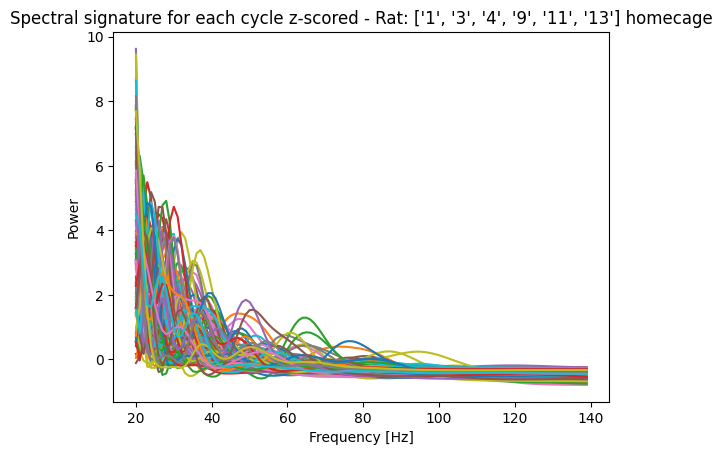

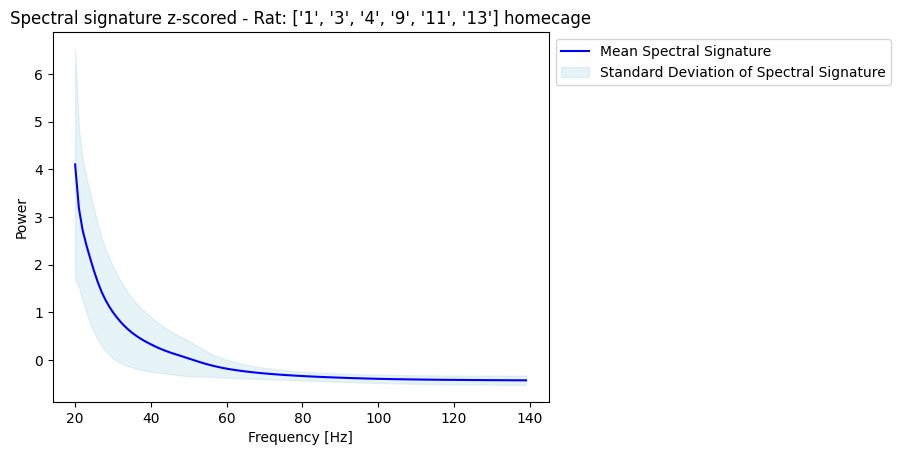

In [16]:
# Plot each row in one plot
for i in range(power_array_hc.shape[0]):
    plt.plot(frequencies, power_array_hc.T[i, :], label=f'Row {i + 1}')

# Add labels and legend
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')
plt.title(f'Spectral signature for each cycle z-scored - Rat: {target_folders} homecage')

# Show the plot

plt.show()

# Calculate the mean power across all cycles
spectral_signature_mean_hc = np.mean(power_array_hc.T, axis=0)

# Calculate the standard deviation across all cycles (instead of standard error of the mean)
spectral_signature_std_hc = np.std(power_array_hc.T, axis=0)

# Plot the mean power across all cycles
plt.plot(frequencies, spectral_signature_mean_hc, linestyle='-', color='blue', label='Mean Spectral Signature')

# Fill the area between mean - std and mean + std with a translucent color
plt.fill_between(frequencies, spectral_signature_mean_hc - spectral_signature_std_hc, spectral_signature_mean_hc + spectral_signature_std_hc, color='lightblue', alpha=0.3, label='Standard Deviation of Spectral Signature')

plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')
plt.title(f'Spectral signature z-scored - Rat: {target_folders} homecage')

# Place the legend outside of the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()



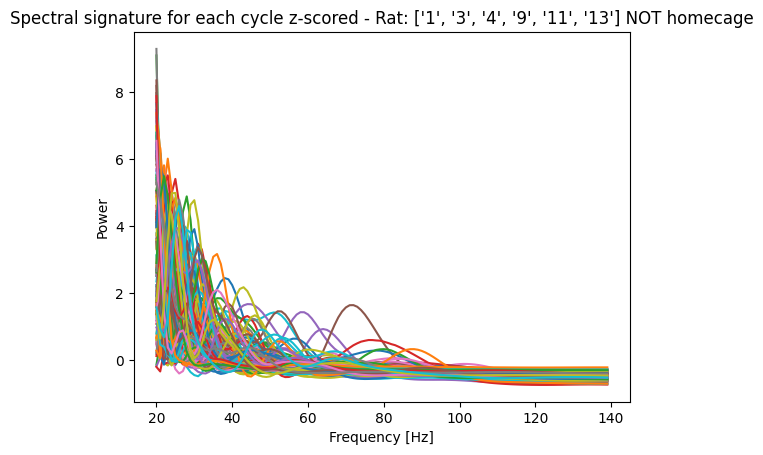

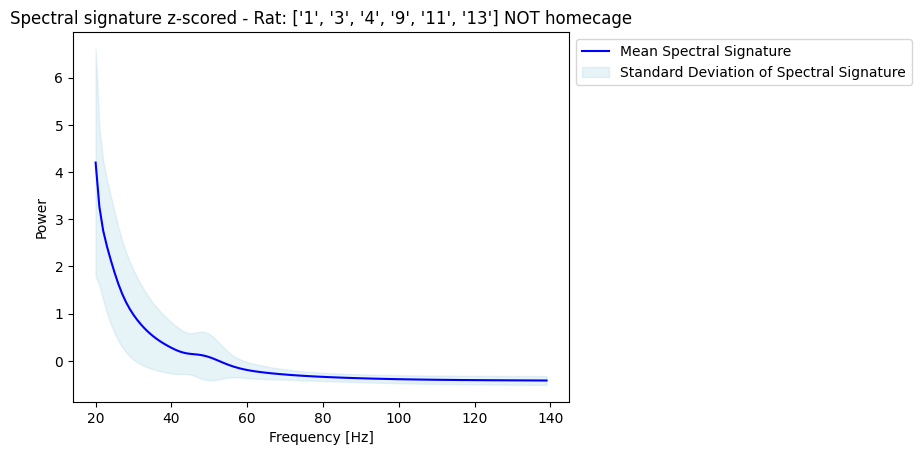

In [14]:
# Plot each row in one plot
for i in range(power_array_non_hc.shape[0]):
    plt.plot(frequencies, power_array_non_hc.T[i, :], label=f'Row {i + 1}')

# Add labels and legend
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')
plt.title(f'Spectral signature for each cycle z-scored - Rat: {target_folders} NOT homecage')

# Show the plot

plt.show()

# Calculate the mean power across all cycles
spectral_signature_mean_non_hc = np.mean(power_array_non_hc.T, axis=0)

# Calculate the standard deviation across all cycles (instead of standard error of the mean)
spectral_signature_std_non_hc = np.std(power_array_non_hc.T, axis=0)

# Plot the mean power across all cycles
plt.plot(frequencies, spectral_signature_mean_non_hc, linestyle='-', color='blue', label='Mean Spectral Signature')

# Fill the area between mean - std and mean + std with a translucent color
plt.fill_between(frequencies, spectral_signature_mean_non_hc - spectral_signature_std_non_hc, spectral_signature_mean_non_hc + spectral_signature_std_non_hc, color='lightblue', alpha=0.3, label='Standard Deviation of Spectral Signature')

plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')
plt.title(f'Spectral signature z-scored - Rat: {target_folders} NOT homecage')

# Place the legend outside of the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()